# Convert HeadLoss to Mutual Information matrix

In [60]:
import pandas as pd

In [61]:
# Copyright 2021 D-Wave Systems Inc.
#
#    Licensed under the Apache License, Version 2.0 (the "License");
#    you may not use this file except in compliance with the License.
#    You may obtain a copy of the License at
#
#        http://www.apache.org/licenses/LICENSE-2.0
#
#    Unless required by applicable law or agreed to in writing, software
#    distributed under the License is distributed on an "AS IS" BASIS,
#    WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#    See the License for the specific language governing permissions and
#    limitations under the License.

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import networkx as nx

def plot_bqm(bqm):
    """Plot binary quadratic model as a labeled graph."""
    g = nx.Graph()
    g.add_nodes_from(bqm.variables)
    g.add_edges_from(bqm.quadratic)

    plt.figure(figsize=(8, 8))
    ax = plt.gca()
    ax.set_title(f"BQM with {len(bqm)} nodes and {len(bqm.quadratic)} edges")
    nx.draw_circular(g, with_labels=True, node_size=3000, node_color="y")
    plt.show()

def plot_feature_selection(features, selected_features):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_axes([0.1, 0.3, .9, .7])
    ax.set_title("Best Feature Selection")
    ax.set_ylabel('Number of Selected Features')
    ax.set_xticks(np.arange(len(features)))
    ax.set_xticklabels(features, rotation=90)
    ax.set_yticks(np.arange(len(features)))
    ax.set_yticklabels(np.arange(1, len(features)+1))
    # Set a grid on minor ticks
    ax.set_xticks(np.arange(-0.5, len(features)), minor=True)
    ax.set_yticks(np.arange(-0.5, len(features)), minor=True)
    ax.grid(which='minor', color='black')
    ax.imshow(selected_features, cmap=colors.ListedColormap(['white', 'red']))

# Copyright 2021 D-Wave Systems Inc.
#
#    Licensed under the Apache License, Version 2.0 (the "License");
#    you may not use this file except in compliance with the License.
#    You may obtain a copy of the License at
#
#        http://www.apache.org/licenses/LICENSE-2.0
#
#    Unless required by applicable law or agreed to in writing, software
#    distributed under the License is distributed on an "AS IS" BASIS,
#    WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#    See the License for the specific language governing permissions and
#    limitations under the License.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.colors as colors

def two_var_model(in_tuple, a, b):
    ina, inb = in_tuple
    return a*ina + b*inb

def sub_plot(size, small, big, x, subtitles, y, *y2):
    gs = GridSpec(big + 1, small)
    plt.figure(figsize=size)
    for i in range(small):
        ax = 'ax_' + str(i)
        ax = plt.subplot(gs[0, i])
        ax.set_title(subtitles[i])
        if y2:
            ax.plot(x, y2[0]['out'].values, 'ro')
            ax.plot(x, y[y.columns[i]].values, 'bv')
            ax.legend(["out", "model"])
        else:
            ax.plot(x, y[y.columns[i]].values)

    if big:
        axy = plt.subplot(gs[1, :])
        i += 1
        axy.set_title(y.columns[i])
        axy.plot(x, y[y.columns[i]].values, 'r')
    return plt

def plot_toy_signals(df):
    sub_plot((10, 8), 3, True, np.linspace(-np.pi, np.pi, len(df)), df.columns, df)
    plt.suptitle("Toy Problem: System Inputs and Output", fontsize=15)

def plot_two_var_model(df1, df2):
    subtitles = ["Modeling %s and %s" % f0f1 for f0f1 in df1.columns]
    sub_plot((12, 4), 3, 0, np.linspace(-np.pi, np.pi, len(df1)), subtitles, df1, df2)
    plt.suptitle("Toy Problem: Output Vesus Two-Signal Model", fontsize=15)

def plot_lingress(df, toy):
    subtitles = ["%s correlation coefficient: %.2f" % var_rval for var_rval in df.columns]
    sub_plot((12, 4), 3, 0, np.linspace(-np.pi, np.pi, len(df)), subtitles, df, toy)
    plt.suptitle("Toy Problem: Linear Regression", fontsize=15)

# Warning since 0.24.2
#def plot_se(data):
#    pd.DataFrame(data).plot(x='Bins', y=['Maximum', 'Uniform', 'Exp', 'Vals'], style = [ 'ro','b', 'g', 'y'])
#    plt.title("Shannon Entropy")
#    plt.ylabel("Entropy")
def plot_se(data):
    df = pd.DataFrame(data)
    plt.figure(figsize=(5, 4))
    plt.plot(df[['Bins']].values, df[['Maximum']].values, 'ro',
             df[['Bins']].values, df[['Uniform']].values, 'b',
             df[['Bins']].values, df[['Exp']].values, 'g',
             df[['Bins']].values, df[['Vals']].values, 'y')
    plt.title("Shannon Entropy")
    plt.xlabel("Bins")
    plt.ylabel("Entropy")
    plt.legend(['Maximum', 'Uniform', 'Exp', 'Vals'])

def plot_mi(scores):
    if len(scores) > 5:
        plt.figure(figsize=(8, 5))
    else:
        plt.figure(figsize=(4, 4))
    labels, values = zip(*sorted(scores.items(), key=lambda pair: pair[1], reverse=True))
    plt.bar(np.arange(len(labels)), values)
    plt.xticks(np.arange(len(labels)), labels, rotation=90)
    plt.bar(np.arange(len(labels)), values)
    plt.xticks(np.arange(len(labels)), labels, rotation=90)
    plt.title("Mutual Information")
    plt.ylabel("MI with Variable of Interest")

def plot_solutions(result):
    features = []
    energies = []
    for sample, energy in result.data(['sample', 'energy']):
        energies.append(energy)
        features.append([key for (key, value) in sample.items() if value == 1])
    plt.figure(figsize=(40, 20))
    plt.bar(np.arange(len(features)), energies)
    plt.xticks(np.arange(len(features)), features, rotation=90)
    #plt.title("Toy Problem: Unconstrained Solution")
    plt.ylabel("Energy")

def plot_features(features, selected_features):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_axes([0.1, 0.3, .9, .7])
    ax.set_title("Best Feature Selection")
    ax.set_ylabel('Number of Selected Features')
    ax.set_xticks(np.arange(len(features)))
    ax.set_xticklabels(features, rotation=90)
    ax.set_yticks(np.arange(len(features)))
    ax.set_yticklabels(np.arange(1, len(features)+1))
    # Set a grid on minor ticks
    ax.set_xticks(np.arange(-0.5, len(features)), minor=True)
    ax.set_yticks(np.arange(-0.5, len(features)), minor=True)
    ax.grid(which='minor', color='black')
    ax.imshow(selected_features, cmap=colors.ListedColormap(['white', 'red']))
def prob(dataset, max_bins=10):
    """Joint probability distribution P(X) for the given data."""

    # bin by the number of different values per feature
    num_rows, num_columns = dataset.shape
    bins = [min(len(np.unique(dataset[:, ci])), max_bins) for ci in range(num_columns)]

    freq, _ = np.histogramdd(dataset, bins)
    p = freq / np.sum(freq)
    return p

def shannon_entropy(p):
    """Shannon entropy H(X) is the sum of P(X)log(P(X)) for probabilty distribution P(X)."""
    p = p.flatten()
    return -sum(pi*np.log2(pi) for pi in p if pi)
def conditional_shannon_entropy(p, *conditional_indices):
    """Shannon entropy of P(X) conditional on variable j"""

    axis = tuple(i for i in np.arange(len(p.shape)) if i not in conditional_indices)

    return shannon_entropy(p) - shannon_entropy(np.sum(p, axis=axis))

def mutual_information(p, j):
    """Mutual information between all variables and variable j"""
    return shannon_entropy(np.sum(p, axis=j)) - conditional_shannon_entropy(p, j)    

def conditional_mutual_information(p, j, *conditional_indices):
    """Mutual information between variables X and variable Y conditional on variable Z."""

    marginal_conditional_indices = [i-1 if i > j else i for i in conditional_indices]

    return (conditional_shannon_entropy(np.sum(p, axis=j), *marginal_conditional_indices)
            - conditional_shannon_entropy(p, j, *conditional_indices))    

In [62]:
## Read simulation data
#query = """SELECT * FROM delta.`dbfs:/mnt/dlwadlsgen2/waterlink/99QuantumSensorPlacementDEL20/simulation_results`"""
#sdf_simulation_results = spark.sql(query).withColumn("LeakDemand",col("LeakDemand").cast("double")).withColumn("PressureDrop",col("PressureDrop").cast("double"))

In [63]:
pdf_simulation_results = pd.read_csv("simulation_results.csv", sep=';', decimal=",")

In [64]:
#pdf_simulation_results = sdf_simulation_results.toPandas().set_index(['LeakDemand', 'LeakNode', 'SensorLocation']).unstack('SensorLocation')
#pdf_simulation_results.columns = pdf_simulation_results.columns.droplevel()
#pdf_simulation_results = pdf_simulation_results.reset_index()
#pdf_simulation_results

In [65]:
## store as CSV (maybe to transfer towards D-Wave cloud)
#pdf_simulation_results.to_csv("/dbfs/tmp/simulation_results.csv", sep=';', decimal = ',')
#dbutils.fs.mv("dbfs:/tmp/simulation_results.csv", "dbfs:/mnt/dlwadlsgen2/waterlink/99QuantumSensorPlacementDEL20/simulation_results.csv")

In [66]:
list_SensorLocations = list(pdf_simulation_results.columns)
list_SensorLocations.remove('LeakDemand')
list_SensorLocations.remove('LeakNode')
list_SensorLocations.remove('Unnamed: 0')

## MIQUBO: QUBO Representation of Feature Selection
D-Wave systems solve binary quadratic models (BQM)&mdash;the Ising model traditionally used in statistical mechanics and its computer-science equivalent, the quadratic unconstrained binary optimization (QUBO) problem. Given $N$ variables $x_1,...,x_N$, where each variable $x_i$ can have binary values $0$ or $1$, the system finds assignments of values that minimize,
    
$\sum_i^N q_ix_i + \sum_{i<j}^N q_{i,j}x_i  x_j$,
    
where $q_i$ and $q_{i,j}$ are configurable (linear and quadratic) coefficients. To formulate a problem for the D-Wave system is to program $q_i$ and $q_{i,j}$ so that assignments of $x_1,...,x_N$ also represent solutions to the problem.

For feature selection, the Mutual Information QUBO (MIQUBO) method formulates a QUBO based on the approximation above for $I({X_k}; Y)$, which can be submitted to the D-Wave quantum computer for solution.

The reduction of scope to permutations of three variables in this approximate formulation for MI-based optimal feature selection makes it a natural fit for reformulation as a QUBO: 

|  | **Optimization** &nbsp; &nbsp; | **Linear <br>Terms** &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; |	**Quadratic <br>Terms** &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;| **Formula** &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; |	
|:-|:-----------------|:---------------------|:-------------------------|:------------|
| **Feature <br>Selection** &nbsp; &nbsp; | Maximize &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; |$I(X_i;Y)$  | $I(X_j;Y \|X_i)$  | $\sum_{i \in S} \left \{ I(X_i;Y) + \sum_{j \in S, j \ne i} I(X_j;Y \|X_i) \right \}$ |
| **QUBO** | Minimize &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;| $q_ix_i$ | $q_{i,j}x_ix_j$ | $\sum_i^N q_ix_i + \sum_{i<j}^N q_{i,j}x_i  x_j$ | 

You can represent each choice of $n \choose k$ features as the value of solution $x_1,...,x_N$ by encoding $x_i=1$ if feature $X_i$ should be selected and $x_i=0$ if not. With solutions encoded this way, you can represent the QUBO in matrix format, $\mathbf{x}^T \mathbf{Q x}$, where $\mathbf Q$ is an $n$ x $n$ matrix and $\mathbf{x}$ is an $n$ x $1$ matrix (a vector) that should have $k$ ones representing the selected features. 

To map the feature-selection formula to a QUBO, set the elements of $\mathbf Q$ such that

 * diagonal elements (linear coefficients) represent MI: $Q_{ii} \leftarrow -I(X_i;Y)$ 
 * non-diagonal elements (quadratic elements) represent CMI: $Q_{ij} \leftarrow -I(X_j;Y |X_i)$

These QUBO terms are negative because the quantum computer seeks to minimize the programmed problem while the feature-selection formula maximizes. The following subsection codes this and then completes the formulation by adding the $n \choose k$ constraint to the QUBO.

### MIQUBO
This subsection applies the MIQUBO formulation by configuring the QUBO in three parts: 
  (1) linear biases that maximize MI between the variable of interest and each feature 
  (2) quadratic biases that maximize CMI between the variable of interest and each feature, given the prior choice of another feature 
  (3) selection of just $k$ features.

Create a BQM and set the linear coefficients as the MI between `out` and each potential feature.

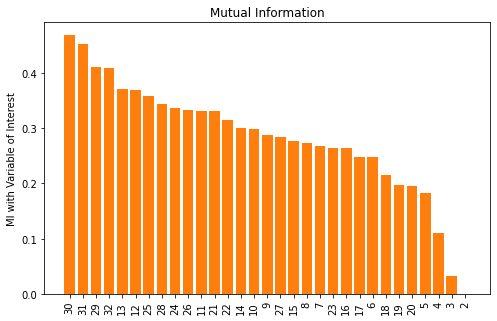

In [67]:
import dimod
import itertools

bqm = dimod.BinaryQuadraticModel.empty(dimod.BINARY)

features = list(set(list_SensorLocations).difference(('1',)))

mi_set = {}
for feature in features:
    mi_set[feature] = mutual_information(prob(pdf_simulation_results[['LeakNode', feature]].values.astype(float)), 1)

plot_mi(mi_set)

In [68]:
keep = 20

sorted_mi = sorted(mi_set.items(), key=lambda pair: pair[1], reverse=True)
pdf_simulation_reduced = pdf_simulation_results[[column[0] for column in sorted_mi[0:keep]] + ["LeakNode"]]
features = list(set(pdf_simulation_reduced.columns).difference(('LeakNode',)))

print("Submitting for {} features: {}".format(keep, features))

Submitting for 20 features: ['8', '22', '28', '24', '7', '25', '12', '32', '11', '29', '9', '15', '13', '30', '21', '26', '10', '31', '14', '27']


In [69]:
## # Build the I-matrix (on request of Peter)
## I_matrix = {}
## analysis_results_per_leak_demand_level = {}
## for f0, f1 in itertools.combinations(features, 2):
##     mi_00 = mutual_information(prob(pdf_simulation_results[[f0, f0]].values.astype(float)), 1)
##     mi_01 = mutual_information(prob(pdf_simulation_results[[f0, f1]].values.astype(float)), 1)
##     mi_10 = mutual_information(prob(pdf_simulation_results[[f1, f0]].values.astype(float)), 1)
##     I_matrix[f0, f0] = mi_00
##     I_matrix[f0, f1] = mi_01
##     I_matrix[f1, f0] = mi_10
## pdf_imatrix = pd.DataFrame(pd.Series(I_matrix)).unstack(level=-1)    
## pdf_imatrix.to_csv("/dbfs/tmp/imatrix.csv", sep=';', decimal = ',')
## dbutils.fs.mv("dbfs:/tmp/imatrix.csv", "dbfs:/mnt/dlwadlsgen2/waterlink/99QuantumSensorPlacementDEL20/imatrix.csv")

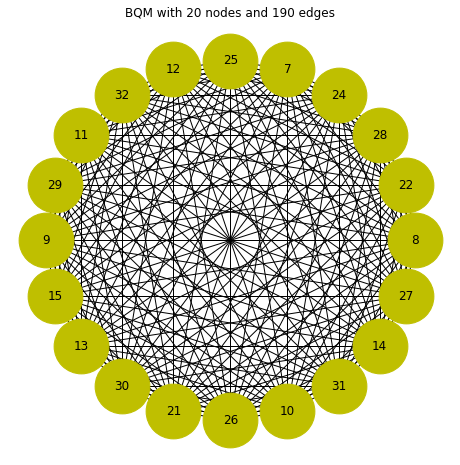

In [96]:
bqm = dimod.BinaryQuadraticModel.empty(dimod.BINARY)

# add the features
for feature in features:
    mi = mutual_information(prob(pdf_simulation_results[['LeakNode', feature]].values.astype(float)), 1)
    bqm.add_variable(feature, -mi)

for f0, f1 in itertools.combinations(features, 2):
    cmi_01 = conditional_mutual_information(prob(pdf_simulation_results[['LeakNode', f0, f1]].values.astype(float)), 1, 2)
    cmi_10 = conditional_mutual_information(prob(pdf_simulation_results[['LeakNode', f1, f0]].values.astype(float)), 1, 2)
    bqm.add_interaction(f0, f1, -cmi_01)
    bqm.add_interaction(f1, f0, -cmi_10)

bqm.normalize()  

plot_bqm(bqm)

In [71]:
# bqm.adj['5']['30']
# bqm.linear['31']

In [97]:
k = 3  # looking for k sensors to be placed
bqm.update(dimod.generators.combinations(bqm.variables, k, strength=5))   # strength : balance between MI and number of sensor requirement

In [73]:
##### can bqm be stored in some file-format, and then be transferred to D-Wave Leap SDK ????

# t = bqm.to_serializable

## https://test-projecttemplate-dimod.readthedocs.io/en/release_notes/reference/generated/dimod.BinaryQuadraticModel.to_json.html#dimod.BinaryQuadraticModel.to_json
##   not yet available in latest version of DIMOD (https://test-projecttemplate-dimod.readthedocs.io/en/latest/reference/bqm/bqm_functions.html)



In [98]:
# Exhaustive calculation ==> most precise evaluation of the problem defined.
sampler = dimod.ExactSolver()
result = sampler.sample(bqm)

In [75]:
# plot_solutions(result)

In [76]:
result.data(['energy'])

<generator object SampleSet.data at 0x7fdadc7a0200>

In [77]:
## appear to be sorted per 'energy' from minimum to maximum ==> best-choice is the first in the list
feature_set = []
energie_set = []
## i = 0 # only select first 10 solutions found
for sample, energy in result.data(['sample', 'energy']):
    energie_set.append(energy)
    feature_set.append([key for (key, value) in sample.items() if value == 1])
    #i += 1
    #if i >= 10:
    #  break

In [78]:
feature_set[0]

['11', '15', '25']

In [79]:
energie_set[0]

-2.75192128143396

In [80]:
feature_set[energie_set.index(min(energie_set))]

['11', '15', '25']

In [81]:
feature_set.index(['12', '21', '27'])

480

In [82]:
feature_set[energie_set.index(max(energie_set))]

['10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '21',
 '22',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '7',
 '8',
 '9']

### Setting Up a QPU as a Solver
Set up a D-Wave system as your solver in the standard way described in the Ocean documentation's Configuring Access to D-Wave Solvers.

minor-embedding, the mapping between the problem's variables to the D-Wave QPU's numerically indexed qubits, can be handled in a variety of ways and this affects solution quality and performance. Ocean software provides tools suited for different types of problems; for example, dwave-system EmbeddingComposite() has a heuristic for automatic embedding. This example uses FixedEmbeddingComposite() with the embedding found using an algorithm tuned for cliques (complete graphs).

Helper function qpu_working_graph below creates a dwave-networkx graph that represents the working graph of the QPU selected by DWaveSampler, a Pegasus or Chimera graph with the same sets of nodes (qubits) and edges (couplers) as the QPU. Ocean software's minorminer finds an embedding for the required clique size in the working graph.

In [83]:
#from dwave.system import DWaveSampler, FixedEmbeddingComposite
#from minorminer.busclique import find_clique_embedding

#qpu = DWaveSampler()

#qpu_working_graph = qpu.to_networkx_graph()
#embedding = find_clique_embedding(bqm.variables, qpu_working_graph)

#qpu_sampler = FixedEmbeddingComposite(qpu, embedding)

#print("Maximum chain length for minor embedding is {}.".format(max(len(x) for x in embedding.values())))

In [84]:
from hybrid.reference.kerberos import KerberosSampler
kerberos_sampler = KerberosSampler() 

In [99]:
selected_features = np.zeros((len(features), len(features)))


In [100]:
print("Submitting for k={}".format(k))
kbqm = dimod.generators.combinations(features, k, strength=5)
kbqm.update(bqm)
kbqm.normalize()

Submitting for k=3


0.01991731265926044

In [101]:
best = kerberos_sampler.sample(kbqm, 
                                qpu_sampler=qpu_sampler, 
                                qpu_reads=10000, 
                                max_iter=1,
                                qpu_params={'label': 'Notebook - Feature Selection'}
                                ).first.sample

In [102]:
best

{'10': 0,
 '11': 1,
 '12': 0,
 '13': 0,
 '14': 0,
 '15': 1,
 '21': 0,
 '22': 0,
 '24': 0,
 '25': 1,
 '26': 0,
 '27': 0,
 '28': 0,
 '29': 0,
 '30': 0,
 '31': 0,
 '32': 0,
 '7': 0,
 '8': 0,
 '9': 0}

In [ ]:




for fi, f in enumerate(features):
    selected_features[k-1, fi] = best[f]

plot_feature_selection(features, selected_features)

Submitting for k=1
Submitting for k=2
Submitting for k=3
Submitting for k=4
Submitting for k=5
Submitting for k=6
Submitting for k=7
Submitting for k=8
Submitting for k=9
Submitting for k=10
Submitting for k=11
Submitting for k=12
Submitting for k=13
Submitting for k=14
Submitting for k=15
Submitting for k=16
Submitting for k=17
Submitting for k=18
Submitting for k=19
Submitting for k=20


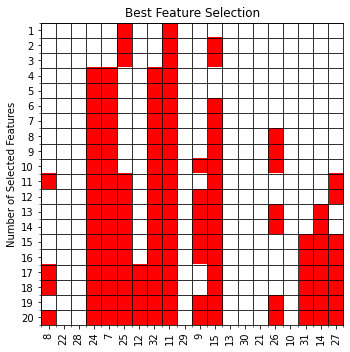

In [87]:
for k in range(1, len(features) + 1):
    print("Submitting for k={}".format(k))
    kbqm = dimod.generators.combinations(features, k, strength=6)
    kbqm.update(bqm)
    kbqm.normalize()
    
    best = kerberos_sampler.sample(kbqm, 
                                   qpu_sampler=qpu_sampler, 
                                   qpu_reads=10000, 
                                   max_iter=1,
                                   qpu_params={'label': 'Notebook - Feature Selection'}
                                  ).first.sample
    
    for fi, f in enumerate(features):
        selected_features[k-1, fi] = best[f]

plot_feature_selection(features, selected_features)

In [93]:
selected_features

array([[0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
        0., 0., 0., 0.],
       [1., 0., 0., 1., 1., 1.